In [1]:
import sqlite3
import zipfile
import pandas as pd


## Imports the data and explores it
Steps will be:
- Import the data
- Check out the data
- Check the info
- Describe the data
- Check the shape

In [2]:
# Imports the data
bom_raw = pd.read_csv("../data/bom.movie_gross.csv.gz")
# imdb_raw = pd.read_sql("../data/im.db.zip")
rt_movie_info_raw = pd.read_csv("../data/rt.movie_info.tsv.gz", delimiter="\t")
rt_reviews_raw = pd.read_csv("../data/rt.reviews.tsv.gz", delimiter="\t", encoding='cp1252')
tmdb_movies_raw = pd.read_csv("../data/tmdb.movies.csv.gz")
tn_movie_budgets_raw = pd.read_csv("../data/tn.movie_budgets.csv.gz")

In [3]:
# imdb_raw and rt_review_data_raw initially don't load due to an encoding error. Here we detect the encoding type for each before inserting it into the codeblock above
with open("../data/rt.reviews.tsv.gz") as rt_reviews:
    print(rt_reviews)
with open("../data/im.db.zip") as imdbraw:
    print(imdbraw)

<_io.TextIOWrapper name='../data/rt.reviews.tsv.gz' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='../data/im.db.zip' mode='r' encoding='UTF-8'>


In [4]:
# Check out the data
bom_raw.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
rt_movie_info_raw.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [6]:
rt_reviews_raw.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [7]:
rt_reviews_raw.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [8]:
tmdb_movies_raw.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [9]:
tn_movie_budgets_raw.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [10]:
# Check the information of the data set
bom_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [11]:
rt_movie_info_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [12]:
rt_reviews_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [13]:
tmdb_movies_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [14]:
tn_movie_budgets_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## JB's cleaning: RT Reviews and TN Movie Budgets

In [15]:
rt_reviews_raw = pd.read_csv("../data/rt.reviews.tsv.gz", delimiter="\t", encoding='cp1252')

In [16]:
rt_reviews_raw.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [17]:
rt_reviews_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


### Things I notice:
* date needs to be a date dtype
* what is top critic?
* value counts of fresh column
* maybe change rating to a different dtype/format
* skim review for key words?
* I wonder how many ID's there are (1,135)

In [18]:
# change date to datetime
rt_reviews_raw['date'] = pd.to_datetime(rt_reviews_raw['date'])

In [19]:
# checking work
rt_reviews_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          54432 non-null  int64         
 1   review      48869 non-null  object        
 2   rating      40915 non-null  object        
 3   fresh       54432 non-null  object        
 4   critic      51710 non-null  object        
 5   top_critic  54432 non-null  int64         
 6   publisher   54123 non-null  object        
 7   date        54432 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 3.3+ MB


In [20]:
rt_reviews_raw.top_critic.value_counts()

0    41336
1    13096
Name: top_critic, dtype: int64

In [21]:
rt_reviews_raw.loc[rt_reviews_raw['top_critic'] == 1].head()

,id,review,rating,fresh,critic,top_critic,publisher,date
24,3,"The rapid dialogue is dry and mannered, like a...",2.5/4,rotten,Joe Williams,1,St. Louis Post-Dispatch,2012-09-06
47,3,It feels like each and every moment bursts for...,2/4,rotten,Stephanie Merry,1,Washington Post,2012-08-24
50,3,"There's not really a movie there, nothing that...",2/4,rotten,Mick LaSalle,1,San Francisco Chronicle,2012-08-23
54,3,The film is all too faithful to its un-cinemat...,1.5/4,rotten,Colin Covert,1,Minneapolis Star Tribune,2012-08-23
55,3,"Cosmopolis,"" because of its allegiance to the ...",2/4,rotten,Moira MacDonald,1,Seattle Times,2012-08-23


In [22]:
top_critics = rt_reviews_raw.loc[rt_reviews_raw['top_critic'] == 1]

In [23]:
top_critics.critic.value_counts()

Roger Ebert           461
James Berardinelli    348
Owen Gleiberman       210
Peter Travers         193
Mick LaSalle          166
                     ... 
Nina Darnton            1
Chris Petit             1
Darren Franich          1
Bob Baker               1
Colin Shearman          1
Name: critic, Length: 855, dtype: int64

There are 855 "top critics". I'm not sure this will be very helpful.

In [24]:
rt_reviews_raw.fresh.value_counts()

fresh     33035
rotten    21397
Name: fresh, dtype: int64

According to Rotten Tomatoes "When at least 60% of reviews for a movie or TV show are positive, a red tomato is displayed to indicate its Fresh status. When less than 60% of reviews for a movie or TV show are positive, a green splat is displayed to indicate its Rotten status."

In [25]:
rt_reviews_raw.rating.value_counts().head(40)

3/5      4327
4/5      3672
3/4      3577
2/5      3160
2/4      2712
2.5/4    2381
3.5/4    1777
3.5/5    1289
5/5      1237
B        1163
1/5      1113
1.5/4    1095
4/4       995
2.5/5     992
B+        832
1/4       822
B-        821
C         779
C+        665
4.5/5     567
7/10      522
A-        514
8/10      505
C-        493
6/10      468
1.5/5     405
A         397
5/10      351
D         324
9/10      304
4/10      252
D+        204
0/5       162
8         143
3/10      140
1         138
0/4       132
7         125
F         109
0.5/4     100
Name: rating, dtype: int64

This is bad. There's ratings A-F, ratings based on a 10 point scale, ratings out of 5, ratings out of 4 and out of 6, fractions, decimals...

I want to convert all of these to a decimal for a percentage for ease of use to comparing with the imdb database.

In [26]:
# making new column for the new ratings
rt_reviews_raw['new_rating'] = rt_reviews_raw['rating']

In [27]:
rt_reviews_raw.new_rating = rt_reviews_raw.new_rating.str.strip().str.replace('+', '').str.replace('-', '')

In [28]:
rt_reviews_raw.new_rating = rt_reviews_raw.new_rating.str.replace("A", "5/5").str.replace("B", "4/5").str.replace("C", "3/5").str.replace("D", "2/5").str.replace("F", "1/5")

In [29]:
temp = rt_reviews_raw['new_rating'].str.split('/', expand=True)
temp[1].fillna(10, inplace=True)

In [30]:
temp[0].fillna(0, inplace=True)

In [31]:
temp[0] = temp[0].str.replace('N', '0')

In [32]:
temp[0] = temp[0].str.replace('R', '0')

In [33]:
temp[0] = temp[0].str.replace('T', '0')

In [34]:
temp[0] = temp[0].str.replace(' ', '.')

In [35]:
temp[0] = temp[0].astype(float)

In [36]:
temp[1] = temp[1].astype(float)

In [37]:
temp[2] = temp[0]/temp[1]

In [38]:
rt_reviews_raw['new_rating'] = temp[2]

In [39]:
rt_reviews_raw.new_rating.value_counts()

0.800000    7147
0.600000    6832
0.500000    4127
0.400000    4072
0.750000    3664
            ... 
1.550000       1
0.960000       1
0.433333       1
1.250000       1
0.310000       1
Name: new_rating, Length: 85, dtype: int64

In [40]:
count_table = rt_reviews_raw.new_rating.value_counts()

wrong_rating = count_table.index > 1

wrong_rating.sum()

5

In [41]:
count_table.loc[wrong_rating]

1.05    9
1.10    4
1.50    2
1.55    1
1.25    1
Name: new_rating, dtype: int64

In [42]:
rt_reviews_cleaned = rt_reviews_raw.loc[rt_reviews_raw['new_rating'] <= 1]

In [43]:
rt_reviews_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40898 entries, 0 to 54431
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          40898 non-null  int64         
 1   review      35365 non-null  object        
 2   rating      40898 non-null  object        
 3   fresh       40898 non-null  object        
 4   critic      38919 non-null  object        
 5   top_critic  40898 non-null  int64         
 6   publisher   40671 non-null  object        
 7   date        40898 non-null  datetime64[ns]
 8   new_rating  40898 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 3.1+ MB


In [44]:
rt_ratings = rt_reviews_cleaned.groupby(['id'], as_index=False)['new_rating'].mean()
rt_ratings

,id,new_rating
0,3,0.628097
1,5,0.685000
2,6,0.592683
3,8,0.703750
4,10,0.579918
...,...,...
1110,1996,0.636304
1111,1997,0.498913
1112,1998,0.600000
1113,1999,0.588710


In [45]:
tn_movie_budgets_raw.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [46]:
tn_movie_budgets_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### Things I notice:
* there are no nulls!
* release_date needs to be a date type
* Are there duplicate movie names?
* The production budget, domestic_gross, and worldwide_gross should be converted to integers

In [47]:
# change release_date to datetime
tn_movie_budgets_raw['release_date'] = pd.to_datetime(tn_movie_budgets_raw['release_date'])

In [48]:
#checking work
tn_movie_budgets_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   object        
 4   domestic_gross     5782 non-null   object        
 5   worldwide_gross    5782 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 271.2+ KB


In [49]:
# taking out $ and , in numbers
tn_movie_budgets_raw['production_budget'] = tn_movie_budgets_raw['production_budget'].str.replace('$', '').str.replace(',', '')

In [50]:
# casting production_budget as integer
tn_movie_budgets_raw['production_budget'] = tn_movie_budgets_raw['production_budget'].astype(int)

In [51]:
# checking work
tn_movie_budgets_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   object        
 5   worldwide_gross    5782 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 271.2+ KB


In [52]:
# taking out $ and , in numbers
tn_movie_budgets_raw['domestic_gross'] = tn_movie_budgets_raw['domestic_gross'].str.replace('$', '').str.replace(',', '')

In [53]:
# casting domestic_gross as integer
tn_movie_budgets_raw['domestic_gross'] = tn_movie_budgets_raw['domestic_gross'].astype(int)

In [54]:
# checking work
tn_movie_budgets_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 271.2+ KB


In [55]:
# taking out $ and , in numbers
tn_movie_budgets_raw['worldwide_gross'] = tn_movie_budgets_raw['worldwide_gross'].str.replace('$', '').str.replace(',', '')

In [56]:
# casting worldwide_gross as integer
tn_movie_budgets_raw['worldwide_gross'] = tn_movie_budgets_raw['worldwide_gross'].astype(int)

In [57]:
# checking work
tn_movie_budgets_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 271.2+ KB


In [58]:
rt_movie_info_raw.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [59]:
rt_movie_info_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [60]:
#Fix Runtime to only numbers
rt_movie_info_raw['runtime'] = rt_movie_info_raw['runtime'].str.replace(' minutes', '')
rt_movie_info_raw['runtime'] = rt_movie_info_raw['runtime'].fillna(0)
rt_movie_info_raw['runtime'] = rt_movie_info_raw['runtime'].astype('float')

In [61]:
rt_movie_info_cleaned = rt_movie_info_raw

In [62]:
# change name of 'rating' column to 'rated'
rt_movie_info_cleaned = rt_movie_info_cleaned.rename(columns={'rating': 'rated'})

In [63]:
rot_tom = rt_ratings.merge(rt_movie_info_cleaned,
                                   on = 'id')

In [64]:
rot_tom.groupby(['id'])['rated'].count()

id
3       1
5       1
6       1
8       1
10      1
       ..
1996    1
1997    1
1998    1
1999    1
2000    1
Name: rated, Length: 1115, dtype: int64

In [65]:
rot_tom.loc[rot_tom["id"] == 3]

,id,new_rating,synopsis,rated,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,3,0.628097,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108.0,Entertainment One


In [82]:
rot_tom.to_csv('rt_cleaned_combined.csv')

## Handling Duplicates
We will check for duplicates and see how we should handle them

## Removing unneeded columns
Columns we don't need include:
- event_id: we've made the dataset unique on event_id and we don't need the id for joins
- accident_number: we already have an event_id and have removed duplicates because of accident_numbers
- registration_number: private information not needed for the analysis
- publication_date: we don't need to know when the data was published for the analysis
- investigation_type: we already filtered to just accidents
- report_status: the data is long sentance form and we don't have the ability to parse it

### Replacing categorical data with unknown
There is some categorical data we will want to replace with unknown:
- aircraft_damage
- make
- model
- purpose_of_flight
- weather_condition
- broad_phase_of_flight

## Conclusion
We now have a cleaned up data set with mostly non-null values and have focused on the columns we need

# eda on rotten tomatoes

In [66]:
rot_tom.head()

,id,new_rating,synopsis,rated,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,3,0.628097,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108.0,Entertainment One
1,5,0.685000,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116.0,NaN
2,6,0.592683,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128.0,NaN
3,8,0.703750,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95.0,Warner Bros. Pictures
4,10,0.579918,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82.0,Paramount Pictures


In [67]:
rot_tom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 0 to 1114
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1115 non-null   int64  
 1   new_rating    1115 non-null   float64
 2   synopsis      1099 non-null   object 
 3   rated         1114 non-null   object 
 4   genre         1114 non-null   object 
 5   director      997 non-null    object 
 6   writer        879 non-null    object 
 7   theater_date  986 non-null    object 
 8   dvd_date      986 non-null    object 
 9   currency      299 non-null    object 
 10  box_office    299 non-null    object 
 11  runtime       1115 non-null   float64
 12  studio        412 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 122.0+ KB


In [68]:
import matplotlib.pyplot as plt

In [69]:
ratings = rot_tom.groupby('rated',as_index=False)['new_rating'].mean()
ratings

,rated,new_rating
0,G,0.660845
1,NR,0.672566
2,PG,0.591437
3,PG-13,0.564879
4,R,0.600617


''

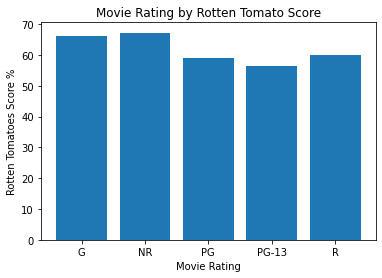

In [70]:
fig, ax = plt.subplots()

ax.bar(x=ratings['rated'], height = ratings['new_rating']*100)
ax.set_ylabel('Rotten Tomatoes Score %')
ax.set_xlabel('Movie Rating')
ax.set_title("Movie Rating by Rotten Tomato Score")
;

In [71]:
rot_tom.genre.value_counts().head(40)

Drama                                                     105
Comedy                                                     85
Comedy|Drama                                               64
Drama|Mystery and Suspense                                 53
Art House and International|Drama                          42
Comedy|Romance                                             29
Action and Adventure|Drama|Mystery and Suspense            29
Action and Adventure|Drama                                 28
Drama|Romance                                              25
Art House and International|Comedy|Drama                   22
Horror                                                     21
Comedy|Drama|Romance                                       21
Action and Adventure|Science Fiction and Fantasy           17
Classics|Drama                                             17
Classics|Drama|Mystery and Suspense                        16
Horror|Mystery and Suspense                                13
Drama|Mu

In [72]:
conn = sqlite3.connect('../data/im.db')

In [73]:
pd.read_sql("""

SELECT *
FROM movie_ratings
JOIN directors
    ON movie_ratings.movie_id = directors.movie_id

""", conn)

,movie_id,averagerating,numvotes,movie_id,person_id
0,tt10356526,8.3,31,tt10356526,nm8353804
1,tt10356526,8.3,31,tt10356526,nm8353804
2,tt10384606,8.9,559,tt10384606,nm9250842
3,tt10384606,8.9,559,tt10384606,nm9932562
4,tt1042974,6.4,20,tt1042974,nm1915232
...,...,...,...,...,...
181384,tt9844256,7.5,24,tt9844256,nm0849465
181385,tt9844256,7.5,24,tt9844256,nm0849465
181386,tt9851050,4.7,14,tt9851050,nm1272773
181387,tt9886934,7.0,5,tt9886934,nm0001206


In [74]:
# top 10 directors

pd.read_sql("""

SELECT AVG(m.averagerating) AS AverageRating, p.primary_name AS Director
FROM movie_ratings m
JOIN directors d
    ON m.movie_id = d.movie_id
JOIN persons p
    on d.person_id = p.person_id
WHERE m.AverageRating > 8.9 AND m.numvotes > 100
GROUP BY Director
ORDER BY m.AverageRating DESC
LIMIT 10
""", conn)

,AverageRating,Director
0,9.9,Nagaraja Uppunda
1,9.7,Quentin Tarantino
2,9.7,Arsel Arumugam
3,9.6,Sudheer Shanbhogue
4,9.6,Shankar
5,9.6,Nikoloz Khomasuridze
6,9.6,Karzan Kardozi
7,9.6,Abhinav Thakur
8,9.5,Mattia Colombo
9,9.5,Lauren Ross


In [75]:
# top 10 writers

pd.read_sql("""

SELECT AVG(m.averagerating) AS AverageRating, p.primary_name AS Writer
FROM movie_ratings m
JOIN writers w
    ON m.movie_id = w.movie_id
JOIN persons p
    on w.person_id = p.person_id
WHERE m.AverageRating > 8.9 AND m.numvotes > 100
GROUP BY Writer
ORDER BY m.AverageRating DESC
LIMIT 10
""", conn)

,AverageRating,Writer
0,9.7,Quentin Tarantino
1,9.7,Arsel Arumugam
2,9.6,Sudheer Shanbhogue
3,9.6,Nikoloz Khomasuridze
4,9.6,Lasha Kankava
5,9.6,Karzan Kardozi
6,9.5,Saman Weeraman
7,9.5,Mukunda Michael Dewil
8,9.5,Mukunda Das
9,9.5,Milos Ninkovic


In [76]:
# runtime (from movie_basics) vs rating (from movie_ratings) 
pd.read_sql("""

SELECT AVG(m.averagerating) AS AverageRating, b.runtime_minutes
FROM movie_ratings m
JOIN movie_basics b
    ON m.movie_id = b.movie_id
WHERE m.AverageRating > 8.9 AND m.numvotes > 100
GROUP BY b.runtime_minutes
ORDER BY m.AverageRating DESC
LIMIT 10
""", conn)

,AverageRating,runtime_minutes
0,9.90,138.0
1,9.70,125.0
2,9.60,149.0
3,9.60,106.0
4,9.60,92.0
5,9.30,113.0
6,9.50,90.0
7,9.45,86.0
8,9.50,83.0
9,9.50,46.0


In [77]:
# movie basics - genre and movie ratings - averagerating
# pd.read_sql("""

# SELECT genre

# """, conn)

In [78]:
# movie basics - genre and runtime
genre_runtime = pd.read_sql("""

SELECT genres, runtime_minutes
FROM movie_basics

""", conn)

In [79]:
genre_runtime['genres'] = genre_runtime['genres'].str.split(',')

genre_runtime.head()

,genres,runtime_minutes
0,"[Action, Crime, Drama]",175.0
1,"[Biography, Drama]",114.0
2,[Drama],122.0
3,"[Comedy, Drama]",NaN
4,"[Comedy, Drama, Fantasy]",80.0


In [80]:
pd.get_dummies(genre_runtime, columns=['genres'])

TypeError: unhashable type: 'list'